## Incidentes cibernéticos entre 2005 y 2020
Reportado de parte del Consejo de Relaciones Exteriores

El número de filas son 481 y 12 columnas

Los datos que se obtienen son el título, fecha, afiliaciones, descripción, respuesta, victimas, categoría y tipo de ataque

Se quiere predecir la categoría que seguirá recibiendo un aumento de ataques cibernéticos y de que tipo en los próximos años.

**** Se importan librerías a utilizar

---



In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import seaborn as sn
from sklearn.preprocessing import StandardScaler

*** Se lee el dataset

---



In [23]:
df = pd.read_csv('/content/cyber-operations-incidents 2.csv')
df.head()

,Title,Date,Affiliations,Description,Response,Victims,Sponsor,Type,Category,Sources_1,Sources_2,Sources_3
0,Attack on Austrian foreign ministry,2/13/2020,Turla,The suspected Russian hackers conducted a week...,Confirmation https://www.theregister.co.uk/2...,Austrian Foreign Ministry,Russian Federation,Espionage,Government,https://www.theregister.co.uk/2020/02/14/austr...,https://www.bmeia.gv.at/en/the-ministry/press/...,NaN
1,Spear-phishing campaign against unnamed U.S. g...,1/23/2020,Konni Group,The suspected North Korean threat actor Konni ...,NaN,Employees of the U.S. government,Korea (Democratic People's Republic of),Espionage,Government,https://unit42.paloaltonetworks.com/the-fractu...,NaN,NaN
2,Australian Signals Directorate,4/6/2020,NaN,Responsible for attacking infrastructure that ...,NaN,NaN,Australia,Data destruction,Private sector,https://www.minister.defence.gov.au/minister/l...,https://www.zdnet.com/article/australia-on-the...,NaN
3,Catfishing of Israeli soldiers,2/16/2020,APT-C-23,The Hamas-associated threat actor APT-C-23 tar...,Hack Back https://www.bleepingcomputer.com/n...,Israeli Defense Forces (IDF) soldiers,"Palestine, State of",Espionage,Military,https://www.bleepingcomputer.com/news/security...,https://research.checkpoint.com/2020/hamas-and...,NaN
4,Targeting of U.S. companies and government age...,8/10/2020,Fox Kitten,Iranian hackers attacked high-end networking e...,NaN,"U.S. government agencies, U.S. companies",Iran (Islamic Republic of),Espionage,"Government, Private sector",https://www.cybersafe.news/fbi-warns-about-ira...,https://www.zdnet.com/article/fbi-says-an-iran...,NaN


**** Se eliminan columnas con las que no se trabajarán

---



In [24]:
columns_to_drop = ['Title', 'Affiliations', 'Description', 'Response', 'Victims', 'Sponsor', 'Sources_1', 'Sources_2', 'Sources_3']


In [25]:
df.drop(columns_to_drop, axis='columns', inplace=True)
df.head(10)

,Date,Type,Category
0,2/13/2020,Espionage,Government
1,1/23/2020,Espionage,Government
2,4/6/2020,Data destruction,Private sector
3,2/16/2020,Espionage,Military
4,8/10/2020,Espionage,"Government, Private sector"
5,3/29/2020,Espionage,Private sector
6,5/12/2020,Financial Theft,Private sector
7,8/31/2020,Espionage,"Civil society, Private sector, Government"
8,1/13/2020,Espionage,Private sector
9,1/28/2020,Espionage,Civil society


**** Se conoce el tamaño de los datos

---



In [26]:
df.shape

(481, 3)

*** Se eliminan y cuentan los valores nulos

---



In [27]:
df2= df.dropna()

In [28]:
df2.shape

(433, 3)

In [29]:
df2.isnull().sum()

Date        0
Type        0
Category    0
dtype: int64


**** Se agrupan los datos para conocer el número de ataques agrupados por tipo 

---

de ataque con la categoría que recibió el ataque

In [104]:
df2.groupby(['Type','Category'])['Category'].count()


Type               Category                                           
Data destruction   Government                                              2
                   Government, Private sector                              1
                   Military, Private sector                                1
                   Private sector                                          9
                   Private sector, Government                              1
Defacement         Government                                              1
                   Government, Military                                    1
                   Private sector                                          3
Denial of service  Civil society, Private sector                           1
                   Government                                              5
                   Government, Military                                    2
                   Government, Private sector                              1
     

**** Se cuentan los ataques agrupados por la categoría cada día

---



In [31]:
df2.groupby(['Date','Category'])["Category"].count()

Date       Category                  
1/1/2013   Private sector, Military      1
1/1/2018   Government, Private sector    1
1/12/2007  Military                      1
1/12/2010  Private sector                1
1/12/2016  Government, Civil society     1
                                        ..
9/5/2019   Civil society                 1
9/6/2011   Government, Private sector    1
9/6/2018   Private sector                3
9/8/2014   Private sector                1
9/9/2007   Military                      1
Name: Category, Length: 410, dtype: int64

*** Se cuentan los ataques agrupados por el tipo de ataque diario

---



In [32]:
df2.groupby(['Date','Type'])["Type"].count()

Date       Type      
1/1/2013   Espionage     1
1/1/2018   Espionage     1
1/12/2007  Espionage     1
1/12/2010  Defacement    1
1/12/2016  Espionage     1
                        ..
9/5/2019   Espionage     1
9/6/2011   Espionage     1
9/6/2018   Espionage     3
9/8/2014   Espionage     1
9/9/2007   Espionage     1
Name: Type, Length: 393, dtype: int64

**** Se cuenta el número de ataques agrupados por tipos

---



In [97]:
cyber_incidents = df['Type'].value_counts()
cyber_incidents.head(15)

Espionage            374
Sabotage              23
Denial of service     18
Data destruction      14
Financial Theft        7
Doxing                 6
Defacement             5
Name: Type, dtype: int64

In [113]:
cyber_incidents2 = df['Category'].value_counts()
cyber_incidents2

Private sector                                         128
Government                                             104
Government, Private sector                              55
Civil society                                           52
Military                                                21
Government, Military                                    17
Government, Civil society                               15
Private sector, Government                              14
Government, Private sector, Civil society               12
Military, Government                                     8
Civil society, Government                                6
Civil society, Private sector                            6
Private sector, Military                                 4
Military, Private sector                                 3
Military, Civil society                                  2
Private sector, Civil society                            2
Civil society, Private sector, Government               

*** Se dividen los datos en entrenamiento y prueba

---



In [34]:
X= df2.drop(['Type'], axis = 1)
Y = df2[['Type']]

In [35]:
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X,Y,test_size = 0.2, random_state = 10)

In [36]:
X_Test

,Date,Category
92,4/4/2019,Private sector
410,5/20/2013,Private sector
94,10/21/2019,"Military, Government, Civil society"
117,9/5/2019,Civil society
298,12/13/2016,Private sector
...,...,...
449,3/20/2009,Government
133,8/7/2019,"Government, Private sector"
421,9/18/2012,Private sector
274,7/16/2017,Government


In [37]:
Y_Train

,Type
472,Espionage
346,Espionage
105,Espionage
357,Espionage
98,Espionage
...,...
409,Espionage
359,Espionage
15,Espionage
151,Espionage


In [38]:
print(f"X_Train:{X_Train.shape[0]}")
print(f"X_Test:{X_Test.shape[0]}")
print(f"Y_Train:{Y_Train.shape[0]}")
print(f"Y_Test:{Y_Test.shape[0]}")

X_Train:346
X_Test:87
Y_Train:346
Y_Test:87


*** Se definen valores 'x' y 'y' utilizando indicadores get dummy

---



In [39]:
x = df2.iloc[:,1]
y = df2.iloc[: , -1]

** Utilizamos get dummies ya que permite eliminar la primera de las columnas generadas para cada característica codificada

In [40]:
features_final = pd.get_dummies(x, drop_first=True)
features_final.head()

,Defacement,Denial of service,Doxing,Espionage,Financial Theft,Sabotage
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,0,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0


*** Se importa KN de la librería sklearn
Se crea el modelo y classifier nos ayuda a ajustar los parametros del modelo, se indican 3 vecinos

---



In [41]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors= 3, metric= 'euclidean', p=2)
classifier.fit(features_final,y) 

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

*** Se realiza la predicción


---





In [42]:
y_pred = classifier.predict(features_final)

*** Se crea dataframe a partir de diccionario, los valores originales y los valores que el modelo predijo

In [120]:
pd.DataFrame({'y':y, 'y pred':y_pred})

,y,y pred
0,Government,Government
1,Government,Government
2,Private sector,Private sector
3,Military,Government
4,"Government, Private sector",Government
...,...,...
469,Government,Government
470,Government,Government
471,Military,Government
472,Military,Government


In [72]:
#importar librerías para métricas
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [73]:
#Precisión
accuracy_score(y,y_pred)

0.25635103926096997

In [74]:
#Sensibilidad
recall_score(y, y_pred,average='weighted')

0.25635103926096997

In [75]:
#Puntuación F1
f1_score(y, y_pred, average= 'weighted')

0.16982166778737576

*** Matriz de confusión

In [76]:
confusion_matrix(y,y_pred)

array([[ 0,  0,  0,  0, 46,  3,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  5,  0, 89,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  4,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 12,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0, 42,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 11,  0,  0,  0,  1,  0,  0,  0,

In [77]:
labels = df2['Type'].unique()
labels

array(['Espionage', 'Data destruction', 'Financial Theft', 'Sabotage',
       'Defacement', 'Denial of service', 'Doxing'], dtype=object)

**** Se visualizan los datos, primero indicando las variables categoricas 

---



In [48]:
categorical = ["Type"]

In [49]:
categorical_axis_name = ["Category"]

In [50]:
list(zip(categorical,categorical_axis_name))

[('Type', 'Category')]

** Se visualizan los datos divididos por tipo de ataques


---




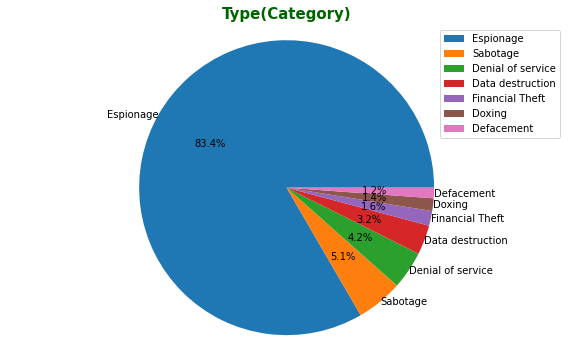

In [51]:
title_font = {"family": "arial", "color":"darkgreen","weight":"bold","size":15}
axis_font = {"family": "arial", "color":"darkred","weight":"bold","size":10}
for i,z in list(zip(categorical,categorical_axis_name)):
    fig, axis = plt.subplots(figsize=(10,6))
    
    observational_values = list(df2[i].value_counts().index)
    total_observation_values = list(df2[i].value_counts())
    
    axis.pie(total_observation_values,labels= observational_values, autopct = "%1.1f%%",startangle = 0 , labeldistance = 1.0)
    axis.axis("equal")
    
    plt.title((i+ "(" + z + ")"), fontdict = title_font)
    plt.legend()
    plt.show()

*** Se visualizan los tipos de ataques con referencia a las categorías que recibieron el ataque

---



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


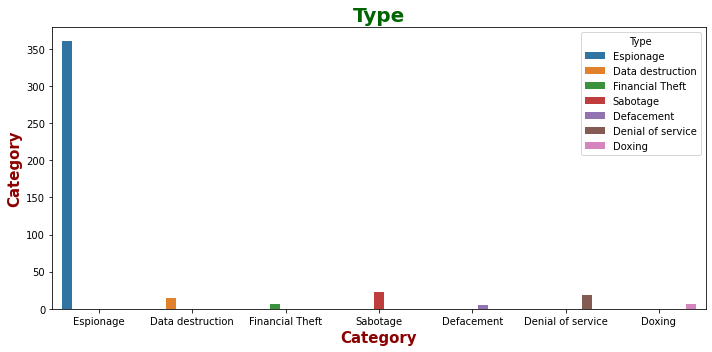

In [52]:
title_font = {"family": "arial", "color":"darkgreen","weight":"bold","size":20}
axis_font = {"family": "arial", "color":"darkred","weight":"bold","size":15}
for i,x in list(zip(categorical,categorical_axis_name)):
    plt.figure(figsize = (10,5))
    sns.countplot(i,data = df2[categorical], hue = "Type")
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(x, fontdict= axis_font)
    plt.ylabel("Category", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

**** Se definen los tipos de los datos

---



In [53]:
print(df2.dtypes)

Date        object
Type        object
Category    object
dtype: object


**** Se indica la fecha por año

---



In [54]:
df2['Year'] = pd.to_datetime(df2['Date']).dt.year
df2.set_index('Year')

<ipython-input-54-b40c1eb5c570>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Year'] = pd.to_datetime(df2['Date']).dt.year


,Date,Type,Category
Year,,,
2020,2/13/2020,Espionage,Government
2020,1/23/2020,Espionage,Government
2020,4/6/2020,Data destruction,Private sector
2020,2/16/2020,Espionage,Military
2020,8/10/2020,Espionage,"Government, Private sector"
...,...,...,...
2007,9/12/2007,Espionage,Government
2006,7/11/2006,Espionage,Government
2006,8/17/2006,Espionage,Military


** Se grafican las tipos de ataques por año

---



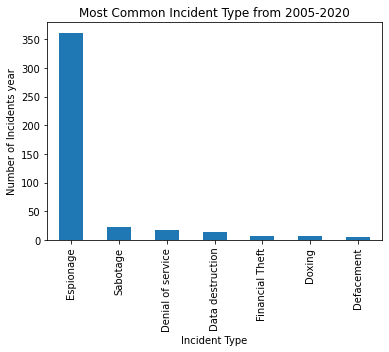

In [55]:
cyber_incidents.plot(kind='bar');                 

plt.title("Most Common Incident Type from 2005-2020")
plt.xlabel("Incident Type")
plt.ylabel("Number of Incidents year");

*** Se grafica el aumento de los ataques a partir del año 2005 a 2020

---



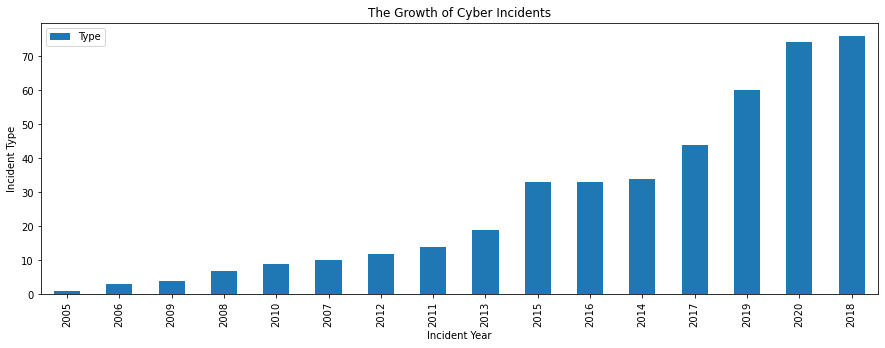

In [108]:
df2[["Year","Type"]] \
            .groupby('Year') \
            .count() \
            .sort_values('Type', ascending=True)\
            .plot(kind='bar', figsize=(15,5));

plt.title("The Growth of Cyber Incidents")
plt.xlabel("Incident Year")
plt.ylabel("Incident Type");